# IAPR Project

In [23]:
# Import main packages
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from skimage.color import rgb2hsv
from skimage.morphology import closing, opening, disk
from skimage import io

## Load images

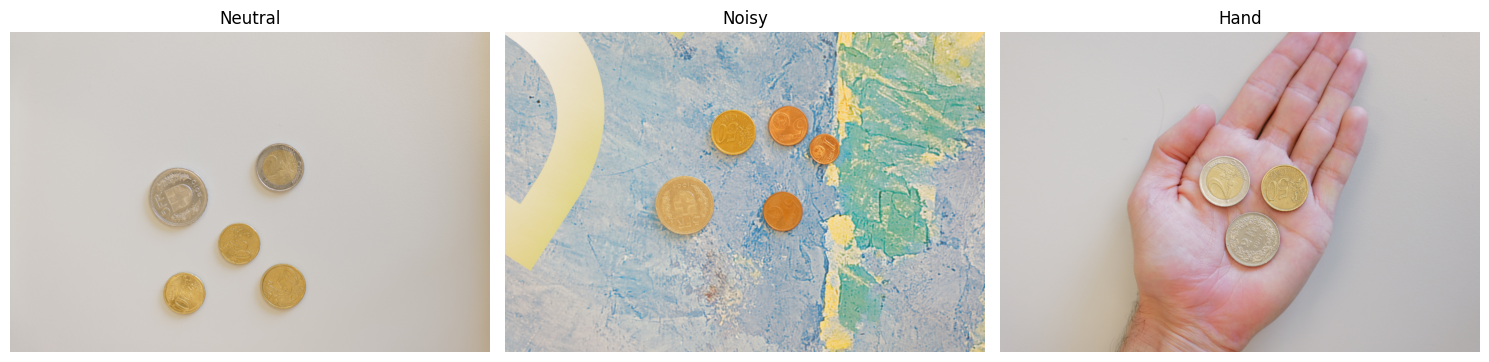

In [47]:
# Define paths
neutral_path = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/1. neutral_bg", "L1010277.jpg")
noisy_path = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/2. noisy_bg", "L1010325.jpg")
hand_path = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/3. hand", "L1010373.jpg")

neutral_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/1. neutral_bg")
noisy_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/2. noisy_bg")
hand_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/train/3. hand")

neutral_test_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Neutral")
noisy_test_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Noisy")
hand_test_folder = os.path.join("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Hand")

# Load images
neutral = io.imread(neutral_path)
noisy = io.imread(noisy_path)
hand = io.imread(hand_path)

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the neutral image
axes[0].imshow(neutral)
axes[0].set_title('Neutral')
axes[0].axis('off')

# Display the noisy image
axes[1].imshow(noisy)
axes[1].set_title('Noisy')
axes[1].axis('off')

# Display the hand image
axes[2].imshow(hand)
axes[2].set_title('Hand')
axes[2].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Threshold HSV

In [3]:
def get_mean_hsv(image_path):
    # Open the image using PIL
    image = Image.open(image_path).convert('RGB')
    
    # Convert the image to a NumPy array
    image_rgb = np.array(image)

    # Convert RGB to HSV channels
    image_hsv = rgb2hsv(image_rgb)
    
    # Calculate the mean for each channel
    mean_h = np.mean(image_hsv[:, :, 0])
    mean_s = np.mean(image_hsv[:, :, 1])
    mean_v = np.mean(image_hsv[:, :, 2])
    
    return mean_h, mean_s, mean_v

In [4]:
def get_mean_h(image_path):
    # Open the image using PIL
    image = Image.open(image_path).convert('RGB')
    
    # Convert the image to a NumPy array
    image_rgb = np.array(image)

    # Convert RGB to HSV channels
    image_hsv = rgb2hsv(image_rgb)
    
    # Calculate the mean for each channel
    mean_h = np.mean(image_hsv[:, :, 0])
    
    return mean_h

In [5]:
def compute_mean_hsv(folder_path):
    mean_hs = []
    mean_ss = []
    mean_vs = []

    for filename in os.listdir(folder_path):
        print(f"Processing {filename}")
        image_path = os.path.join(folder_path, filename)
        mean_h, mean_s, mean_v = get_mean_hsv(image_path)
        print(f"mean_h: {mean_h}, mean_s: {mean_s}, mean_v: {mean_v}")
        mean_hs.append(mean_h)
        mean_ss.append(mean_s)
        mean_vs.append(mean_v)
    
    # Compute the overall mean for each channel
    overall_mean_h = np.mean(mean_hs)
    overall_mean_s = np.mean(mean_ss)
    overall_mean_v = np.mean(mean_vs)

    # Compute the min and max values for each mean
    min_mean_h = np.min(mean_hs)
    min_mean_s = np.min(mean_ss)
    min_mean_v = np.min(mean_vs)
    
    max_mean_h = np.max(mean_hs)
    max_mean_s = np.max(mean_ss)
    max_mean_v = np.max(mean_vs)

    return (overall_mean_h, overall_mean_s, overall_mean_v,
            min_mean_h, min_mean_s, min_mean_v,
            max_mean_h, max_mean_s, max_mean_v)

In [6]:
## Compute mean and std HSV values for each folder
print("FOLDER NEUTRAL")
(mean_h_neutral, mean_s_neutral, mean_v_neutral,
 min_h_neutral, min_s_neutral, min_v_neutral,
 max_h_neutral, max_s_neutral, max_v_neutral) = compute_mean_hsv(neutral_test_folder)
print("FOLDER NOISY")
(mean_h_noisy, mean_s_noisy, mean_v_noisy,
 min_h_noisy, min_s_noisy, min_v_noisy,
 max_h_noisy, max_s_noisy, max_v_noisy) = compute_mean_hsv(noisy_test_folder)
print("FOLDER HAND")
(mean_h_hand, mean_s_hand, mean_v_hand,
 min_h_hand, min_s_hand, min_v_hand,
 max_h_hand, max_s_hand, max_v_hand) = compute_mean_hsv(hand_test_folder)
# Print the results for neutral folder
print(f"Neutral Folder - Mean Hue: {mean_h_neutral:.5f}, Mean Saturation: {mean_s_neutral:.5f}, Mean Value: {mean_v_neutral:.5f},  Min Hue: {min_h_neutral:.5f}, Min Saturation: {min_s_neutral:.5f}, Min Value: {min_v_neutral:.5f}, Max Hue: {max_h_neutral:.5f}, Max Saturation: {max_s_neutral:.5f}, Max Value: {max_v_neutral:.5f}\n")

# Print the results for noisy folder
print(f"Noisy Folder - Mean Hue: {mean_h_noisy:.5f}, Mean Saturation: {mean_s_noisy:.5f}, Mean Value: {mean_v_noisy:.5f}, Min Hue: {min_h_noisy:.5f}, Min Saturation: {min_s_noisy:.5f}, Min Value: {min_v_noisy:.5f}, Max Hue: {max_h_noisy:.5f}, Max Saturation: {max_s_noisy:.5f}, Max Value: {max_v_noisy:.5f}\n")

# Print the results for hand folder
print(f"Hand Folder - Mean Hue: {mean_h_hand:.5f}, Mean Saturation: {mean_s_hand:.5f}, Mean Value: {mean_v_hand:.5f}, Min Hue: {min_h_hand:.5f}, Min Saturation: {min_s_hand:.5f}, Min Value: {min_v_hand:.5f}, Max Hue: {max_h_hand:.5f}, Max Saturation: {max_s_hand:.5f}, Max Value: {max_v_hand:.5f}")

FOLDER NEUTRAL
Processing L0000001.JPG
mean_h: 0.08767698766052022, mean_s: 0.08087363898691764, mean_v: 0.8052244872549027
Processing L0000003.JPG
mean_h: 0.08910661156064378, mean_s: 0.08530320446769783, mean_v: 0.7371339500000005
Processing L0000004.JPG
mean_h: 0.08696778668957979, mean_s: 0.06151536180823173, mean_v: 0.8034244352941174
Processing L0000005.JPG
mean_h: 0.08994685836947904, mean_s: 0.06942717431060526, mean_v: 0.7988611117647059
Processing L0000006.JPG
mean_h: 0.08860816826719131, mean_s: 0.08874362883260381, mean_v: 0.7397650973856221
Processing L0000010.JPG


KeyboardInterrupt: 

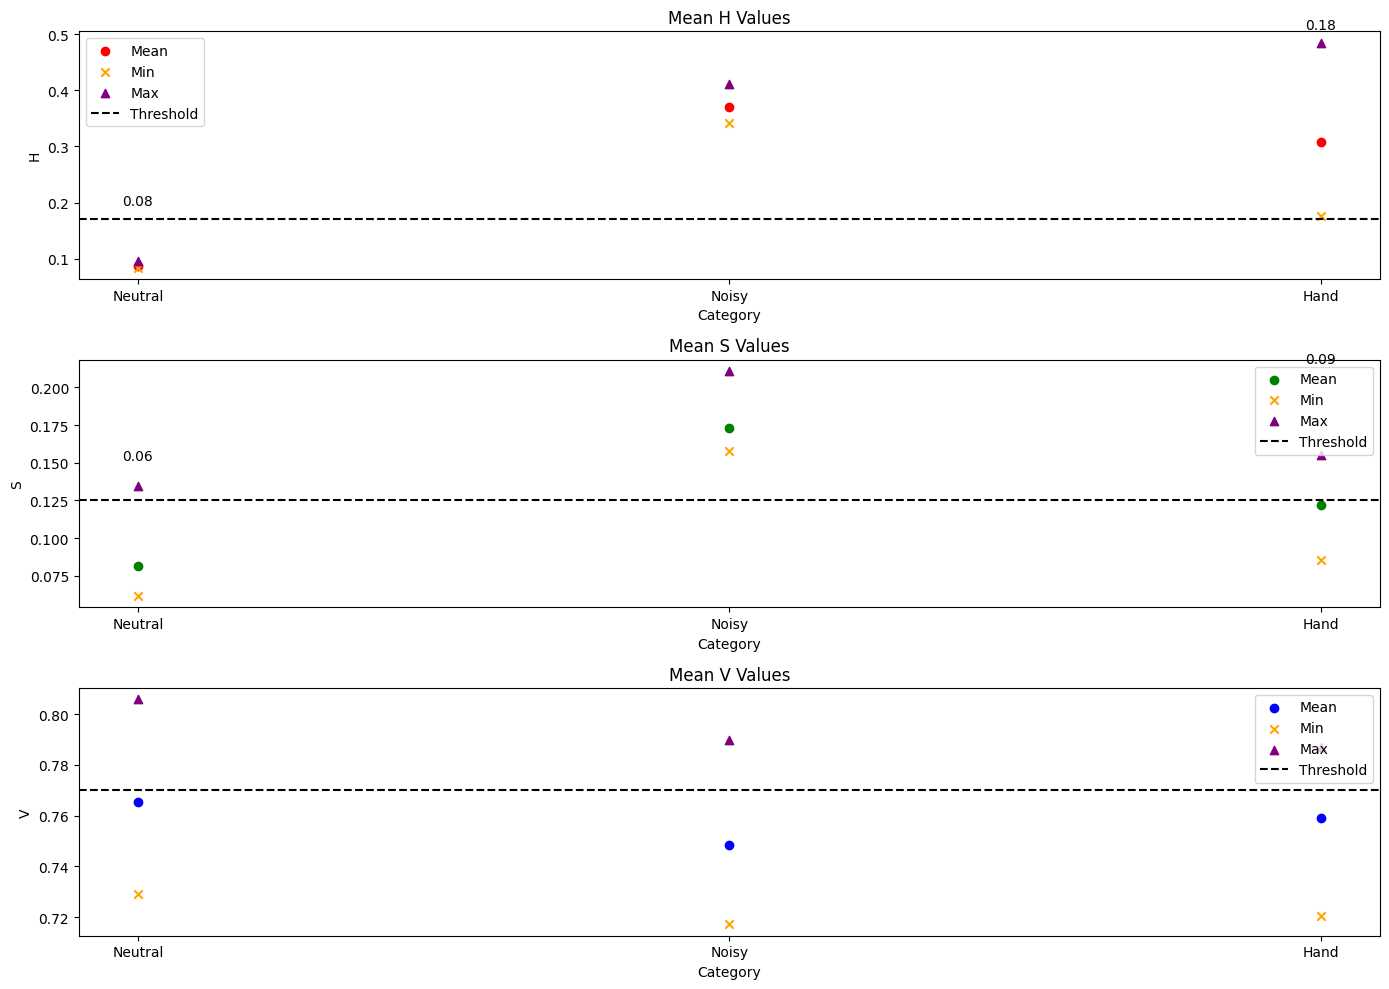

In [11]:
# Define mean_std_values for HSV
mean_std_values = {
    'Neutral': {'H': (mean_h_neutral, min_h_neutral, max_h_neutral), 
                'S': (mean_s_neutral, min_s_neutral, max_s_neutral), 
                'V': (mean_v_neutral, min_v_neutral, max_v_neutral)},
    'Noisy': {'H': (mean_h_noisy, min_h_noisy, max_h_noisy), 
              'S': (mean_s_noisy, min_s_noisy, max_s_noisy), 
              'V': (mean_v_noisy, min_v_noisy, max_v_noisy)},
    'Hand': {'H': (mean_h_hand, min_h_hand, max_h_hand), 
             'S': (mean_s_hand, min_s_hand, max_s_hand), 
             'V': (mean_v_hand, min_v_hand, max_v_hand)}
}

# Prepare data for plotting
categories = list(mean_std_values.keys())
colors = ['red', 'green', 'blue']

# Create scatter plots for Mean, Std, Min, and Max H, S, and V
plt.figure(figsize=(14, 10))

for i, channel in enumerate(['H', 'S', 'V']):
    plt.subplot(3, 1, i+1)
    
    # Plot the means
    plt.scatter(categories, [mean_std_values[cat][channel][0] for cat in categories], color=colors[i], marker='o', label='Mean')
    
    # Add error bars for the standard deviations
    #plt.errorbar(categories, [mean_std_values[cat][channel][0] for cat in categories], yerr=[mean_std_values[cat][channel][1] for cat in categories], fmt='none', ecolor='black', capsize=5, label='Std')
    
    # Plot the min and max values
    plt.scatter(categories, [mean_std_values[cat][channel][1] for cat in categories], color='orange', marker='x', label='Min')
    plt.scatter(categories, [mean_std_values[cat][channel][2] for cat in categories], color='purple', marker='^', label='Max')
    
    # Annotate the standard deviations
    for j, cat in enumerate(categories):
        plt.annotate(f'{mean_std_values[cat][channel][1]:.2f}', (cat, mean_std_values[cat][channel][0] + mean_std_values[cat][channel][1]), textcoords="offset points", xytext=(0,10), ha='center', color='black')
    
    # Add a horizontal line at y=190 for the H channel plot
    if channel == 'H':
        plt.axhline(y=0.15, color='black', linestyle='--', label='Threshold')
    # Add a horizontal line at y=190 for the S channel plot
    elif channel == 'S':
        plt.axhline(y=0.125, color='black', linestyle='--', label='Threshold')
    # Add a horizontal line at y=180 for the V channel plot
    elif channel == 'V':
        plt.axhline(y=0.77, color='black', linestyle='--', label='Threshold')
    
    plt.title(f'Mean {channel} Values')
    plt.xlabel('Category')
    plt.ylabel(f'{channel}')
    plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Threshold RGB

In [15]:
def get_mean_rgb(image_path):
    # Open the image using PIL
    image = Image.open(image_path).convert('RGB')
    
    # Convert the image to a NumPy array
    image_rgb = np.array(image)
    
    # Calculate the mean for each channel
    mean_r = np.mean(image_rgb[:, :, 0])
    mean_g = np.mean(image_rgb[:, :, 1])
    mean_b = np.mean(image_rgb[:, :, 2])
    
    return mean_r, mean_g, mean_b


In [16]:
def get_mean_r(image_path):
    # Open the image using PIL
    image = Image.open(image_path).convert('RGB')
    
    # Convert the image to a NumPy array
    image_rgb = np.array(image)
    
    # Calculate the mean for each channel
    mean_r = np.mean(image_rgb[:, :, 0])
    
    return mean_r

In [17]:
def compute_mean_rgb_for_folder(folder_path):
    mean_rs = []
    mean_gs = []
    mean_bs = []

    for filename in os.listdir(folder_path):
        print(f"Processing {filename}")
        image_path = os.path.join(folder_path, filename)
        mean_r, mean_g, mean_b = get_mean_rgb(image_path)
        print(f"mean_r: {mean_r}, mean_g: {mean_g}, mean_b: {mean_b}")
        mean_rs.append(mean_r)
        mean_gs.append(mean_g)
        mean_bs.append(mean_b)
    
    # Compute the overall mean for each channel
    overall_mean_r = np.mean(mean_rs)
    overall_mean_g = np.mean(mean_gs)
    overall_mean_b = np.mean(mean_bs)

    # Compute the min and max values for each mean
    min_mean_r = np.min(mean_rs)
    min_mean_g = np.min(mean_gs)
    min_mean_b = np.min(mean_bs)
    
    max_mean_r = np.max(mean_rs)
    max_mean_g = np.max(mean_gs)
    max_mean_b = np.max(mean_bs)

    return (overall_mean_r, overall_mean_g, overall_mean_b,
+            min_mean_r, min_mean_g, min_mean_b,
            max_mean_r, max_mean_g, max_mean_b)

In [19]:
# Compute mean and std RGB values for each folder
print("FOLDER NEUTRAL")
(mean_r_neutral, mean_g_neutral, mean_b_neutral,
 min_r_neutral, min_g_neutral, min_b_neutral,
 max_r_neutral, max_g_neutral, max_b_neutral) = compute_mean_rgb_for_folder(neutral_test_folder)
print("FOLDER NOISY")
(mean_r_noisy, mean_g_noisy, mean_b_noisy,
 min_r_noisy, min_g_noisy, min_b_noisy,
 max_r_noisy, max_g_noisy, max_b_noisy) = compute_mean_rgb_for_folder(noisy_test_folder)
print("FOLDER HAND")
(mean_r_hand, mean_g_hand, mean_b_hand,
 min_r_hand, min_g_hand, min_b_hand,
 max_r_hand, max_g_hand, max_b_hand) = compute_mean_rgb_for_folder(hand_test_folder)

# Print the results for neutral folder
print(f"Neutral Folder - Mean Red: {mean_r_neutral:.2f}, Mean Green: {mean_g_neutral:.2f}, Mean Blue: {mean_b_neutral:.2f}, Min Red: {min_r_neutral:.2f}, Min Green: {min_g_neutral:.2f}, Min Blue: {min_b_neutral:.2f}, Max Red: {max_r_neutral:.2f}, Max Green: {max_g_neutral:.2f}, Max Blue: {max_b_neutral:.2f}\n")

# Print the results for noisy folder
print(f"Noisy Folder - Mean Red: {mean_r_noisy:.2f}, Mean Green: {mean_g_noisy:.2f}, Mean Blue: {mean_b_noisy:.2f}, Min Red: {min_r_noisy:.2f}, Min Green: {min_g_noisy:.2f}, Min Blue: {min_b_noisy:.2f}, Max Red: {max_r_noisy:.2f}, Max Green: {max_g_noisy:.2f}, Max Blue: {max_b_noisy:.2f}\n")

# Print the results for hand folder
print(f"Hand Folder - Mean Red: {mean_r_hand:.2f}, Mean Green: {mean_g_hand:.2f}, Mean Blue: {mean_b_hand:.2f}, Min Red: {min_r_hand:.2f}, Min Green: {min_g_hand:.2f}, Min Blue: {min_b_hand:.2f}, Max Red: {max_r_hand:.2f}, Max Green: {max_g_hand:.2f}, Max Blue: {max_b_hand:.2f}")


FOLDER NEUTRAL
Processing L0000001.JPG
mean_r: 205.327050875, mean_g: 198.15031908333333, mean_b: 189.50237229166666
Processing L0000003.JPG
mean_r: 187.96559979166668, mean_g: 180.95449341666668, mean_b: 172.64854554166666
Processing L0000004.JPG
mean_r: 204.84936933333333, mean_g: 199.03785183333332, mean_b: 192.56774345833333
Processing L0000005.JPG
mean_r: 203.6751865, mean_g: 197.51229166666667, mean_b: 190.14585275
Processing L0000006.JPG
mean_r: 188.63510304166667, mean_g: 181.22888408333333, mean_b: 172.53403354166667
Processing L0000010.JPG
mean_r: 187.73977720833332, mean_g: 180.43247708333334, mean_b: 171.881508375
Processing L0000011.JPG
mean_r: 205.50161566666668, mean_g: 199.3761055, mean_b: 191.6961155
Processing L0000012.JPG
mean_r: 202.384916375, mean_g: 196.15593983333332, mean_b: 188.362389625
Processing L0000013.JPG
mean_r: 187.7783675, mean_g: 179.868812625, mean_b: 172.20603520833333
Processing L0000014.JPG
mean_r: 204.07724679166665, mean_g: 198.01900970833333, m

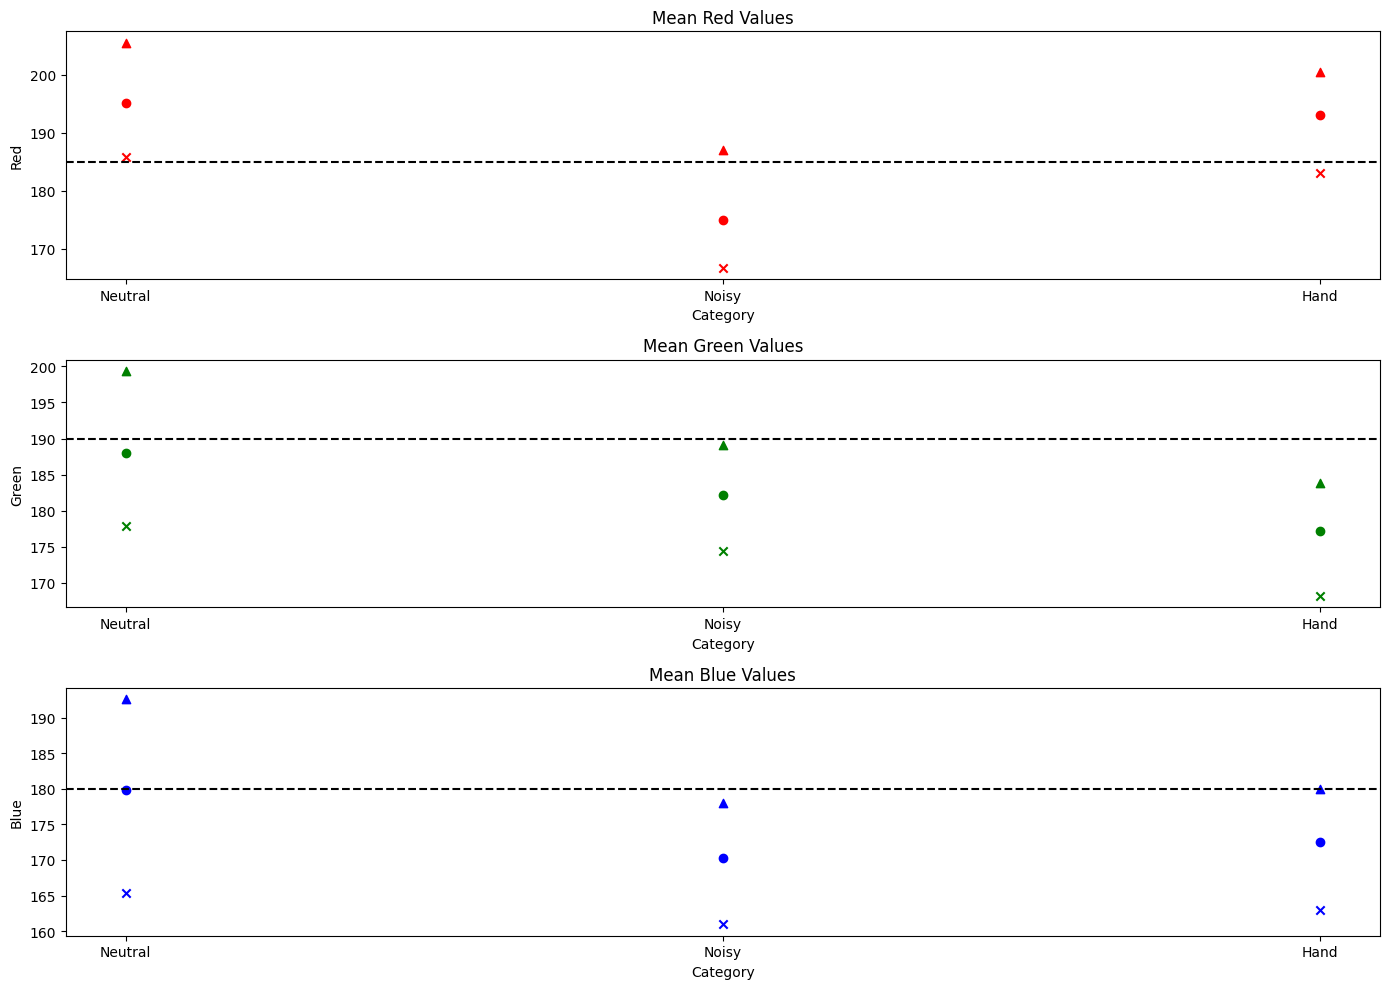

In [20]:
# Define mean_std_values
mean_std_values = {
    'Neutral': {'Red': (mean_r_neutral, min_r_neutral, max_r_neutral), 
                'Green': (mean_g_neutral, min_g_neutral, max_g_neutral), 
                'Blue': (mean_b_neutral, min_b_neutral, max_b_neutral)},
    'Noisy': {'Red': (mean_r_noisy, min_r_noisy, max_r_noisy), 
              'Green': (mean_g_noisy, min_g_noisy, max_g_noisy), 
              'Blue': (mean_b_noisy, min_b_noisy, max_b_noisy)},
    'Hand': {'Red': (mean_r_hand, min_r_hand, max_r_hand), 
             'Green': (mean_g_hand, min_g_hand, max_g_hand), 
             'Blue': (mean_b_hand, min_b_hand, max_b_hand)}
}

# Prepare data for plotting
categories = list(mean_std_values.keys())
colors = ['red', 'green', 'blue']

# Create scatter plots for Mean, Std, Min, and Max Red, Green, and Blue
plt.figure(figsize=(14, 10))

for i, channel in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(3, 1, i+1)
    
    # Plot the means
    plt.scatter(categories, [mean_std_values[cat][channel][0] for cat in categories], color=colors[i], marker='o', label='Mean')
    
    # Add error bars for the standard deviations
    #plt.errorbar(categories, [mean_std_values[cat][channel][0] for cat in categories], yerr=[mean_std_values[cat][channel][1] for cat in categories], fmt='none', ecolor=colors[i], capsize=5, label='Std')
    
    # Plot the min and max values
    plt.scatter(categories, [mean_std_values[cat][channel][1] for cat in categories], color=colors[i], marker='x', label='Min')
    plt.scatter(categories, [mean_std_values[cat][channel][2] for cat in categories], color=colors[i], marker='^', label='Max')
    
    # Annotate the standard deviations
    for j, cat in enumerate(categories):
        plt.annotate(f'{mean_std_values[cat][channel][1]:.2f}', (cat, mean_std_values[cat][channel][0] + mean_std_values[cat][channel][1]), textcoords="offset points", xytext=(0,10), ha='center', color=colors[i])
    
    # Add a horizontal line at y=190 for the Red channel plot
    if channel == 'Red':
        plt.axhline(y=185, color='black', linestyle='--', label='Threshold')
    # Add a horizontal line at y=190 for the Green channel plot
    elif channel == 'Green':
        plt.axhline(y=190, color='black', linestyle='--', label='Threshold')
    # Add a horizontal line at y=180 for the Blue channel plot
    elif channel == 'Blue':
        plt.axhline(y=180, color='black', linestyle='--', label='Threshold')
    
    plt.title(f'Mean {channel} Values')
    plt.xlabel('Category')
    plt.ylabel(f'{channel}')
    #plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Compute RGB and HSV histograms 

In [37]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the image folders
folders = [neutral_test_folder, noisy_test_folder, hand_test_folder]

# Function to compute and plot RGB histogram
def compute_and_plot_rgb_histogram(image, bins=256):
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Compute and plot the histogram for each RGB channel
    plt.figure(figsize=(15, 5))
    colors = ('red', 'green', 'blue')
    channels = ('R', 'G', 'B')

    for i, color in enumerate(colors):
        hist, bins = np.histogram(image_array[..., i], bins=bins, range=(0, 256))
        plt.subplot(1, 3, i + 1)
        plt.plot(bins[:-1], hist, color=color)
        plt.title(f'{channels[i]} channel')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
    
    plt.suptitle('RGB Color Histogram')
    plt.show()

# Function to compute and plot HSV histogram
def compute_and_plot_hsv_histogram(image, bins=256):
    # Convert the image to HSV color space
    hsv_image = image.convert('HSV')
    # Convert image to numpy array
    image_array = np.array(hsv_image)
    
    # Compute and plot the histogram for each HSV channel
    plt.figure(figsize=(15, 5))
    colors = ('orange', 'green', 'blue')
    channels = ('H', 'S', 'V')

    for i, color in enumerate(colors):
        hist, bins = np.histogram(image_array[..., i], bins=bins, range=(0, 256))
        plt.subplot(1, 3, i + 1)
        plt.plot(bins[:-1], hist, color=color)
        plt.title(f'{channels[i]} channel')
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')
        plt.xlim([0, 256])
    
    plt.suptitle('HSV Color Histogram')
    plt.show()


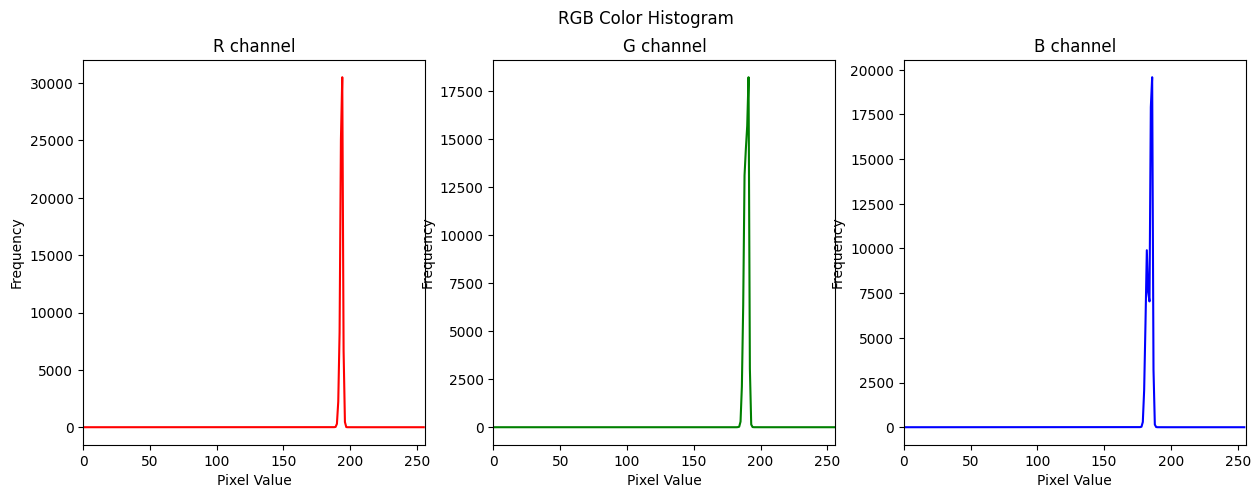

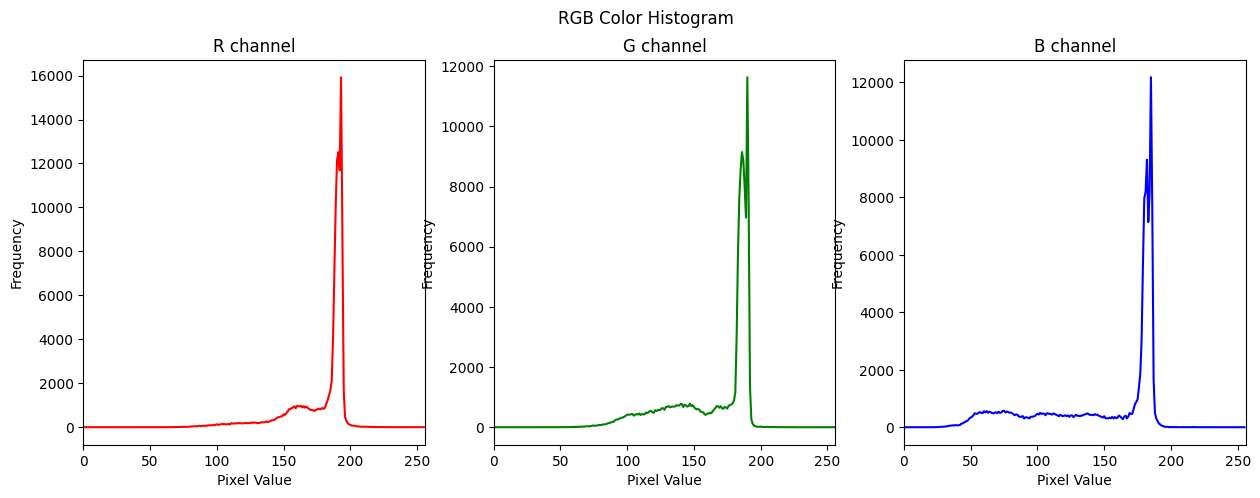

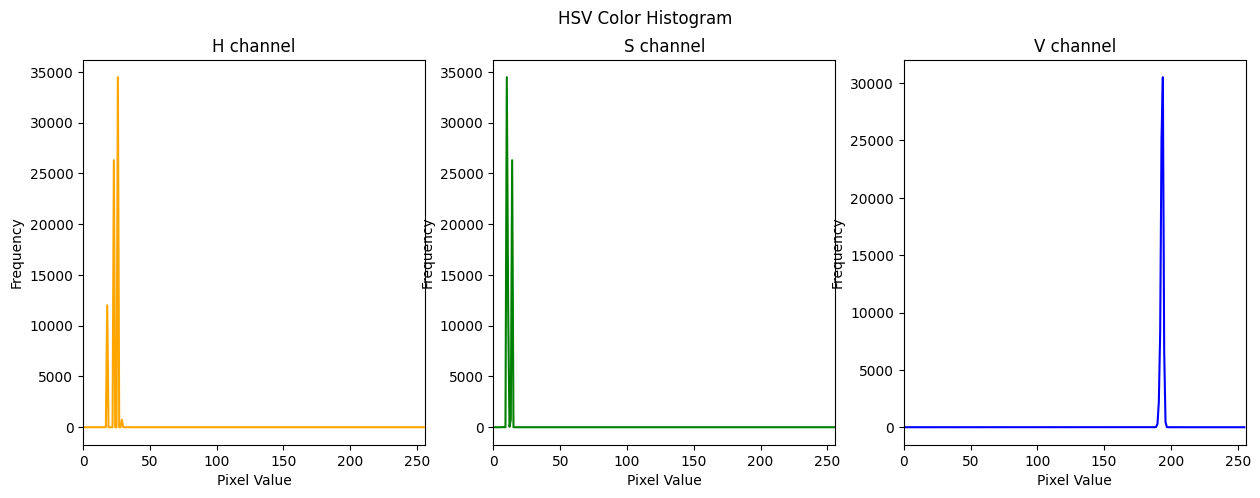

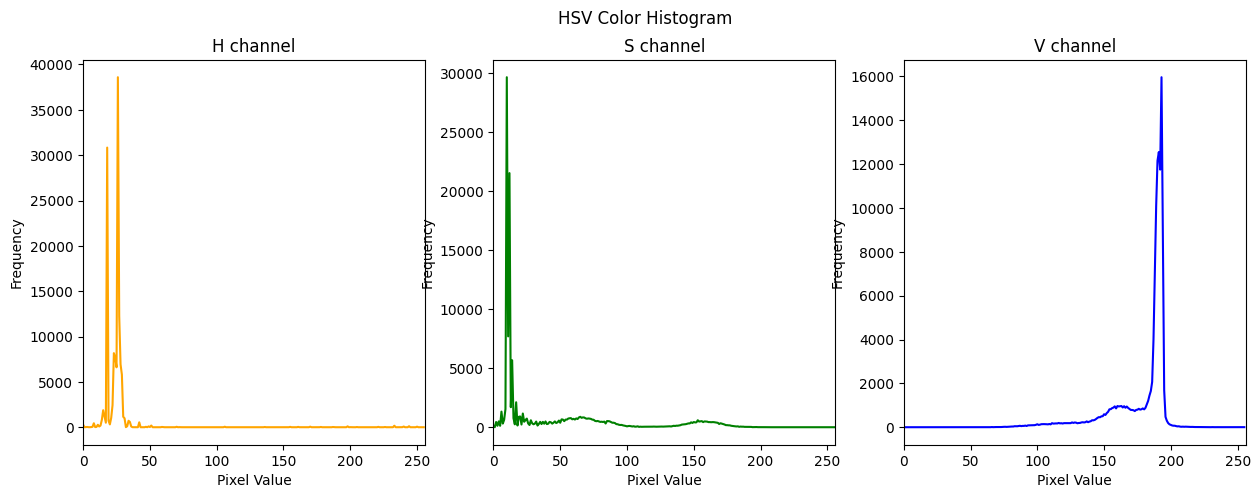

In [46]:
neutral_background = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Neutral/neutral.jpg")
noisy_background = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Noisy/noisy.jpg")
hand_background = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Hand/hand.jpg")
neutral_coins = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Neutral/neutral_coins.jpg")
noisy_coins = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Noisy/noisy_coins.jpg")
hand_coins = Image.open("C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders/Hand/hand_coins.jpg")


compute_and_plot_rgb_histogram(neutral_background)
compute_and_plot_rgb_histogram(neutral_coins)

compute_and_plot_hsv_histogram(neutral_background)
compute_and_plot_hsv_histogram(neutral_coins)

## Scatter plots lab 01

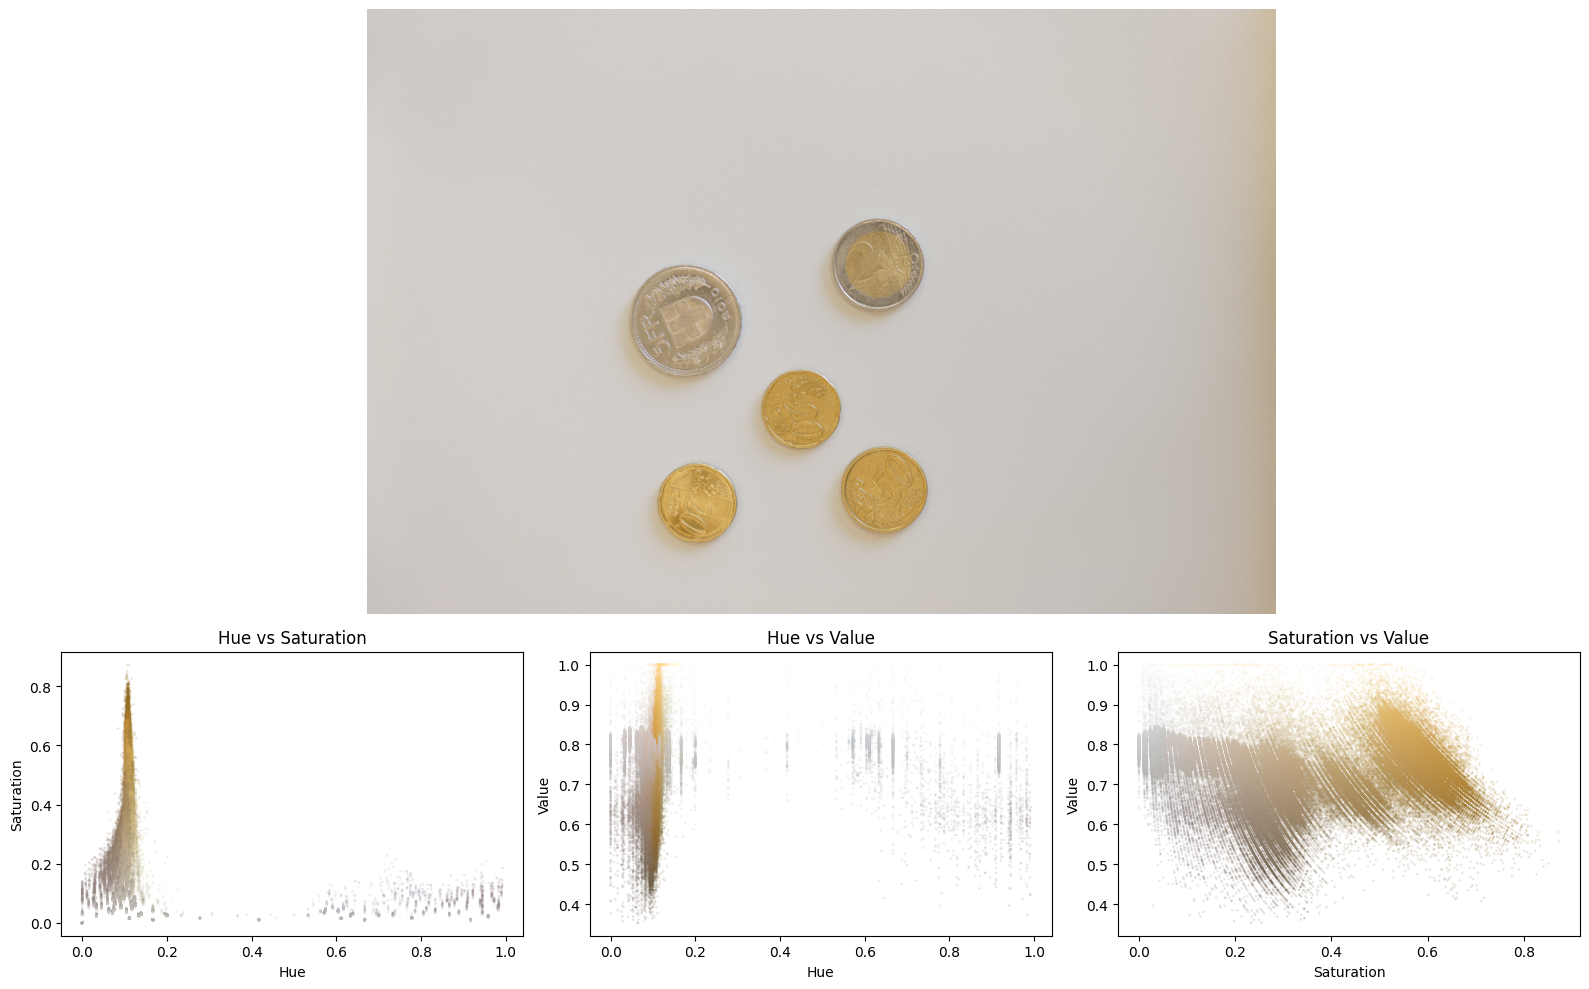

In [42]:
# Import main packages
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from typing import Callable
import os
from datetime import datetime
from skimage.color import rgb2hsv
from skimage.morphology import closing, opening, disk


def extract_hsv_channels(img):
    """
    Extract HSV channels from the input image.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    data_h: np.ndarray (M, N)
        Hue channel of input image
    data_s: np.ndarray (M, N)
        Saturation channel of input image
    data_v: np.ndarray (M, N)
        Value channel of input image
    """

    # Get the shape of the input image
    M, N, C = np.shape(img)

    # Define default values for HSV channels
    data_h = np.zeros((M, N))
    data_s = np.zeros((M, N))
    data_v = np.zeros((M, N))

    # Convert RGB to HSV channels
    hsv_img = rgb2hsv(img)

    # Extract HSV channels from data
    data_h = hsv_img[:,:,0]
    data_s = hsv_img[:,:,1]
    data_v = hsv_img[:,:,2]

    return data_h, data_s, data_v


# Plot color space distribution 
def plot_colors_histo(
    img: np.ndarray,
    func: Callable,
    labels: list[str],
):
    """
    Plot the original image (top) as well as the channel's color distributions (bottom).

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    func: Callable
        A callable function that extracts D channels from the input image
    labels: list of str
        List of D labels indicating the name of the channel
    """

    # Extract colors
    channels = func(img=img)
    C2 = len(channels)
    M, N, C1 = img.shape
    fig = plt.figure(figsize=(16, 10))
    gs = fig.add_gridspec(3, C2)

    # Use random seed to downsample image colors (increase run speed - 10%)
    mask = np.random.RandomState(seed=0).rand(M, N) < 0.1
    
    # Plot base image
    ax = fig.add_subplot(gs[:2, :])
    ax.imshow(img)
    
    # Remove axis
    ax.axis('off')
    ax1 = fig.add_subplot(gs[2, 0])
    ax2 = fig.add_subplot(gs[2, 1])
    ax3 = fig.add_subplot(gs[2, 2])

    # Plot channel distributions
    ax1.scatter(channels[0][mask].flatten(), channels[1][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax1.set_xlabel(labels[0])
    ax1.set_ylabel(labels[1])
    ax1.set_title("{} vs {}".format(labels[0], labels[1]))
    ax2.scatter(channels[0][mask].flatten(), channels[2][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[2])
    ax2.set_title("{} vs {}".format(labels[0], labels[2]))
    ax3.scatter(channels[1][mask].flatten(), channels[2][mask].flatten(), c=img[mask]/255, s=1, alpha=0.1)
    ax3.set_xlabel(labels[1])
    ax3.set_ylabel(labels[2])
    ax3.set_title("{} vs {}".format(labels[1], labels[2]))
        
    plt.tight_layout()

# Call plotting function with your implemented function
plot_colors_histo(
    img = neutral,
    func = extract_hsv_channels,
    labels = ["Hue", "Saturation", "Value"],
)

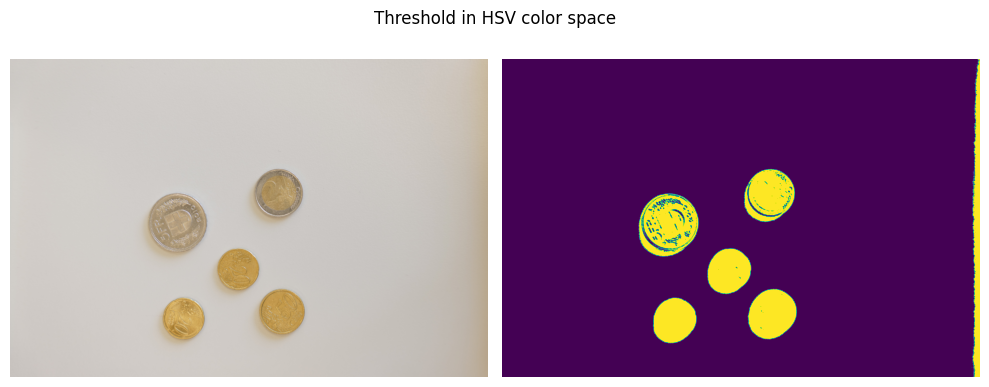

In [45]:
def apply_hsv_threshold(img):
    """
    Apply threshold to the input image in hsv colorspace.

    Args
    ----
    img: np.ndarray (M, N, C)
        Input image of shape MxN and C channels.
    
    Return
    ------
    img_th: np.ndarray (M, N)
        Thresholded image.
    """

    # Define the default value for the input image
    M, N, C = np.shape(img)
    img_th = np.zeros((M, N))

    # Use the previous function to extract HSV channels
    data_h, data_s, data_v = extract_hsv_channels(img=img)

    # Apply thresholds to image
    img_th[(data_s > 0.2)] = True

    return  img_th

# Plot color space distribution 
def plot_thresholded_image(
    img: np.ndarray,
    func: Callable,
    title: str,
):
    """
    Plot the original image and its thresholded version

    Args
    ----
    img: np.ndarray (M, N, 3)
        Input image of shape MxNx3.
    func: Callable
        Thresholded image.
    title: str
        Title of the plot
    """

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    axes[0].imshow(img)
    axes[1].imshow(func(img))
    [a.axis('off') for a in axes]
    plt.suptitle(title)
    plt.tight_layout()

# Find threshold(s) in the hsv channels
plot_thresholded_image(img=neutral, func=apply_hsv_threshold, title="Threshold in HSV color space")

## Classify background

In [19]:
import cv2

    
def classify_background(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    threshold_noisy = ((image[:,:,0] > 60) & (image[:,:,0] < 130))
    threshold_hand = (hsv_image[:,:,0] > 125)

    if (np.sum(threshold_noisy)) > 1000000:
        background = "Noisy"
        print(background)
        return background
       
    elif np.sum(threshold_hand) > 500000:
        background = "Hand"
        print(background)
        return background
    
    else:
        background = "Neutral"
        print(background)
        return background
    
classify_background(neutral)
classify_background(noisy)
classify_background(hand)

Neutral
Noisy
Hand


'Hand'

In [21]:
filenames = os.listdir(hand_test_folder)
for filename in filenames:
    img_path = os.path.join(hand_test_folder, filename)
    img = io.imread(img_path)
    hsv_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    print(np.sum((hsv_image[:,:,0] > 125)))
    print(np.sum((hsv_image[:,:,0] > 125)) > 500000)


7568914
True
4595569
True
3986579
True
8779861
True
8983025
True
6718463
True
2878132
True
8987421
True
3876946
True
3606087
True
3528988
True
2562652
True
3313505
True
3646933
True
2976913
True
9160646
True
4690508
True
5246047
True
5220152
True
3574009
True
4167077
True
6267947
True
9259563
True
6954252
True
7963009
True
9277589
True
4043024
True
9272408
True
4689165
True
8270195
True
3182347
True
8529602
True
4947704
True
3175467
True
3320181
True
9849282
True
9234813
True
3673130
True
3610088
True
10529109
True
6726105
True
4222371
True
4739304
True
4895439
True
10203467
True
3678261
True
3801389
True
3762604
True
5685656
True
4738640
True
4007688
True
3429336
True
4327640
True


In [22]:
import cv2
import numpy as np
import os

def classify_background(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    threshold_noisy = ((image[:,:,0] > 60) & (image[:,:,0] < 130))
    threshold_hand = (hsv_image[:,:,0] > 125)

    if (np.sum(threshold_noisy)) > 1000000:
        background = "Noisy"
        print(background)
        return background
       
    elif np.sum(threshold_hand) > 500000:
        background = "Hand"
        print(background)
        return background
    
    else:
        background = "Neutral"
        print(background)
        return background


def classify_images_in_folders(base_folder):
    folders = ['Neutral', 'Noisy', 'Hand']
    correct_classifications = 0
    total_images = 0
    
    for folder in folders:
        folder_path = os.path.join(base_folder, folder)
        actual_label = folder
        
        for filename in os.listdir(folder_path):
            print(f"Processing {filename}")
            img_path = os.path.join(folder_path, filename)
            test_img = cv2.imread(img_path)
            img_test = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

            predicted_label = classify_background(img_test)
            if predicted_label == actual_label:
                correct_classifications += 1
            total_images += 1

    classification_rate = correct_classifications / total_images if total_images > 0 else 0
    print(f"Classification rate: {classification_rate * 100:.2f}%")

# Usage
base_folder = "C:/Users/rapha/OneDrive/Documents/2. EPFL/Master/MA2/Image Analysis & Pattern Recognition/iapr24-coin-counter/combined_folders"
classify_images_in_folders(base_folder)

Processing L0000001.JPG
Neutral
Processing L0000003.JPG
Neutral
Processing L0000004.JPG
Neutral
Processing L0000005.JPG
Neutral
Processing L0000006.JPG
Neutral
Processing L0000010.JPG
Neutral
Processing L0000011.JPG
Neutral
Processing L0000012.JPG
Neutral
Processing L0000013.JPG
Neutral
Processing L0000014.JPG
Neutral
Processing L0000015.JPG
Neutral
Processing L0000017.JPG
Neutral
Processing L0000020.JPG
Neutral
Processing L0000023.JPG
Neutral
Processing L0000035.JPG
Neutral
Processing L0000038.JPG
Neutral
Processing L0000041.JPG
Neutral
Processing L0000042.JPG
Neutral
Processing L0000043.JPG
Neutral
Processing L0000046.JPG
Neutral
Processing L0000048.JPG
Neutral
Processing L0000049.JPG
Neutral
Processing L0000050.JPG
Neutral
Processing L0000052.JPG
Neutral
Processing L0000053.JPG
Neutral
Processing L0000057.JPG
Neutral
Processing L0000064.JPG
Neutral
Processing L0000065.JPG
Neutral
Processing L0000068.JPG
Neutral
Processing L0000069.JPG
Neutral
Processing L0000073.JPG
Neutral
Processi